🔎 Project Description

This project explores how different attributes (age, height, social media following, league, country, performance rating, and position) influence a football player’s market value. Using Linear Regression, we train a model to predict player prices based on these features.

The dataset simulates a football transfer market, providing numerical and categorical attributes that affect value. The workflow includes:

Data Cleaning – Handling missing values with SimpleImputer.

Feature Encoding – Converting categorical variables with OneHotEncoder.

Train-Test Split – Dividing data into training and testing sets.

Model Training – Applying Linear Regression with scikit-learn.

Evaluation – Using R² score and Mean Squared Error (MSE).

Visualization – Scatter plots of actual vs predicted prices.

User Input Testing – Allowing new player attributes to be input and predicting their market price.

In [1]:
# --- Import Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# --- Load Dataset ---

# Update with your dataset path if needed
file_path = "/content/football_players.csv"

# Read CSV into DataFrame
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741


In [3]:
# --- Features and Target ---

target_col = "MarketValue" if "MarketValue" in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

print("Categorical Columns:", categorical_cols.tolist())
print("Numeric Columns:", numeric_cols.tolist())


Categorical Columns: ['nm', 'lg', 'ct', 'rt', 'ps', 'hr']
Numeric Columns: ['ag', 'ht', 'sf']


In [4]:
# --- Preprocessing Pipelines ---

# Numeric: impute missing + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Categorical: impute missing + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])


In [5]:
# --- Train-Test Split & Model ---

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Full pipeline: preprocess → regression
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("regressor", LinearRegression())])

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [6]:
# --- Model Evaluation ---

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("\nModel Evaluation Metrics:")
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Model Accuracy:", accuracy, "%")



Model Evaluation Metrics:
R² Score: 0.38298385169274896
Mean Squared Error (MSE): 144633084010.72726
Root Mean Squared Error (RMSE): 380306.5658264754
Mean Absolute Error (MAE): 204361.52409892887
Mean Absolute Percentage Error (MAPE): 9.254785032657715 %
Model Accuracy: 90.74521496734229 %


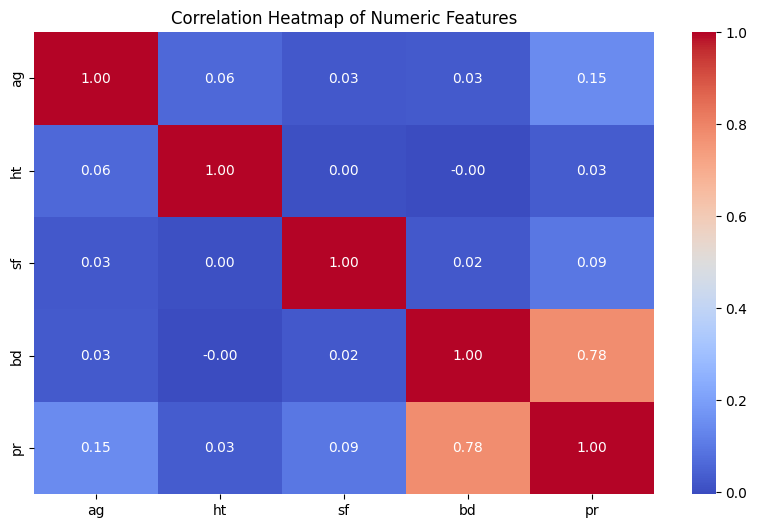

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()